In [37]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# import dask.dataframe as dd
# from mpl_interactions import ioff, panhandler, zoom_factory

import re


In [38]:
# Make a 3D view of the track
%matplotlib widget

def PlotEvent(axis, file_, title, eid):

    hits = pd.read_hdf(file_, 'MC/hits')
    event_hits = hits[hits.event_id == eid]

    # Create 3D axes
    ax = fig.add_subplot(axis)

    fig.set_facecolor('black')
    ax.set_facecolor('black')
    # ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_z+3000, s=50)
    ax.scatter(event_hits.x, event_hits.y,c= event_hits.energy, cmap='Spectral', s=10, label = "reco hits")

    ax.set_xlabel("x [mm]", fontsize = 15)
    ax.set_ylabel("y [mm]", fontsize = 15)
    plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Set the color of the spines (borders) to white
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.set_title(title, fontsize = 15, color='white')

    fig.tight_layout()





370000


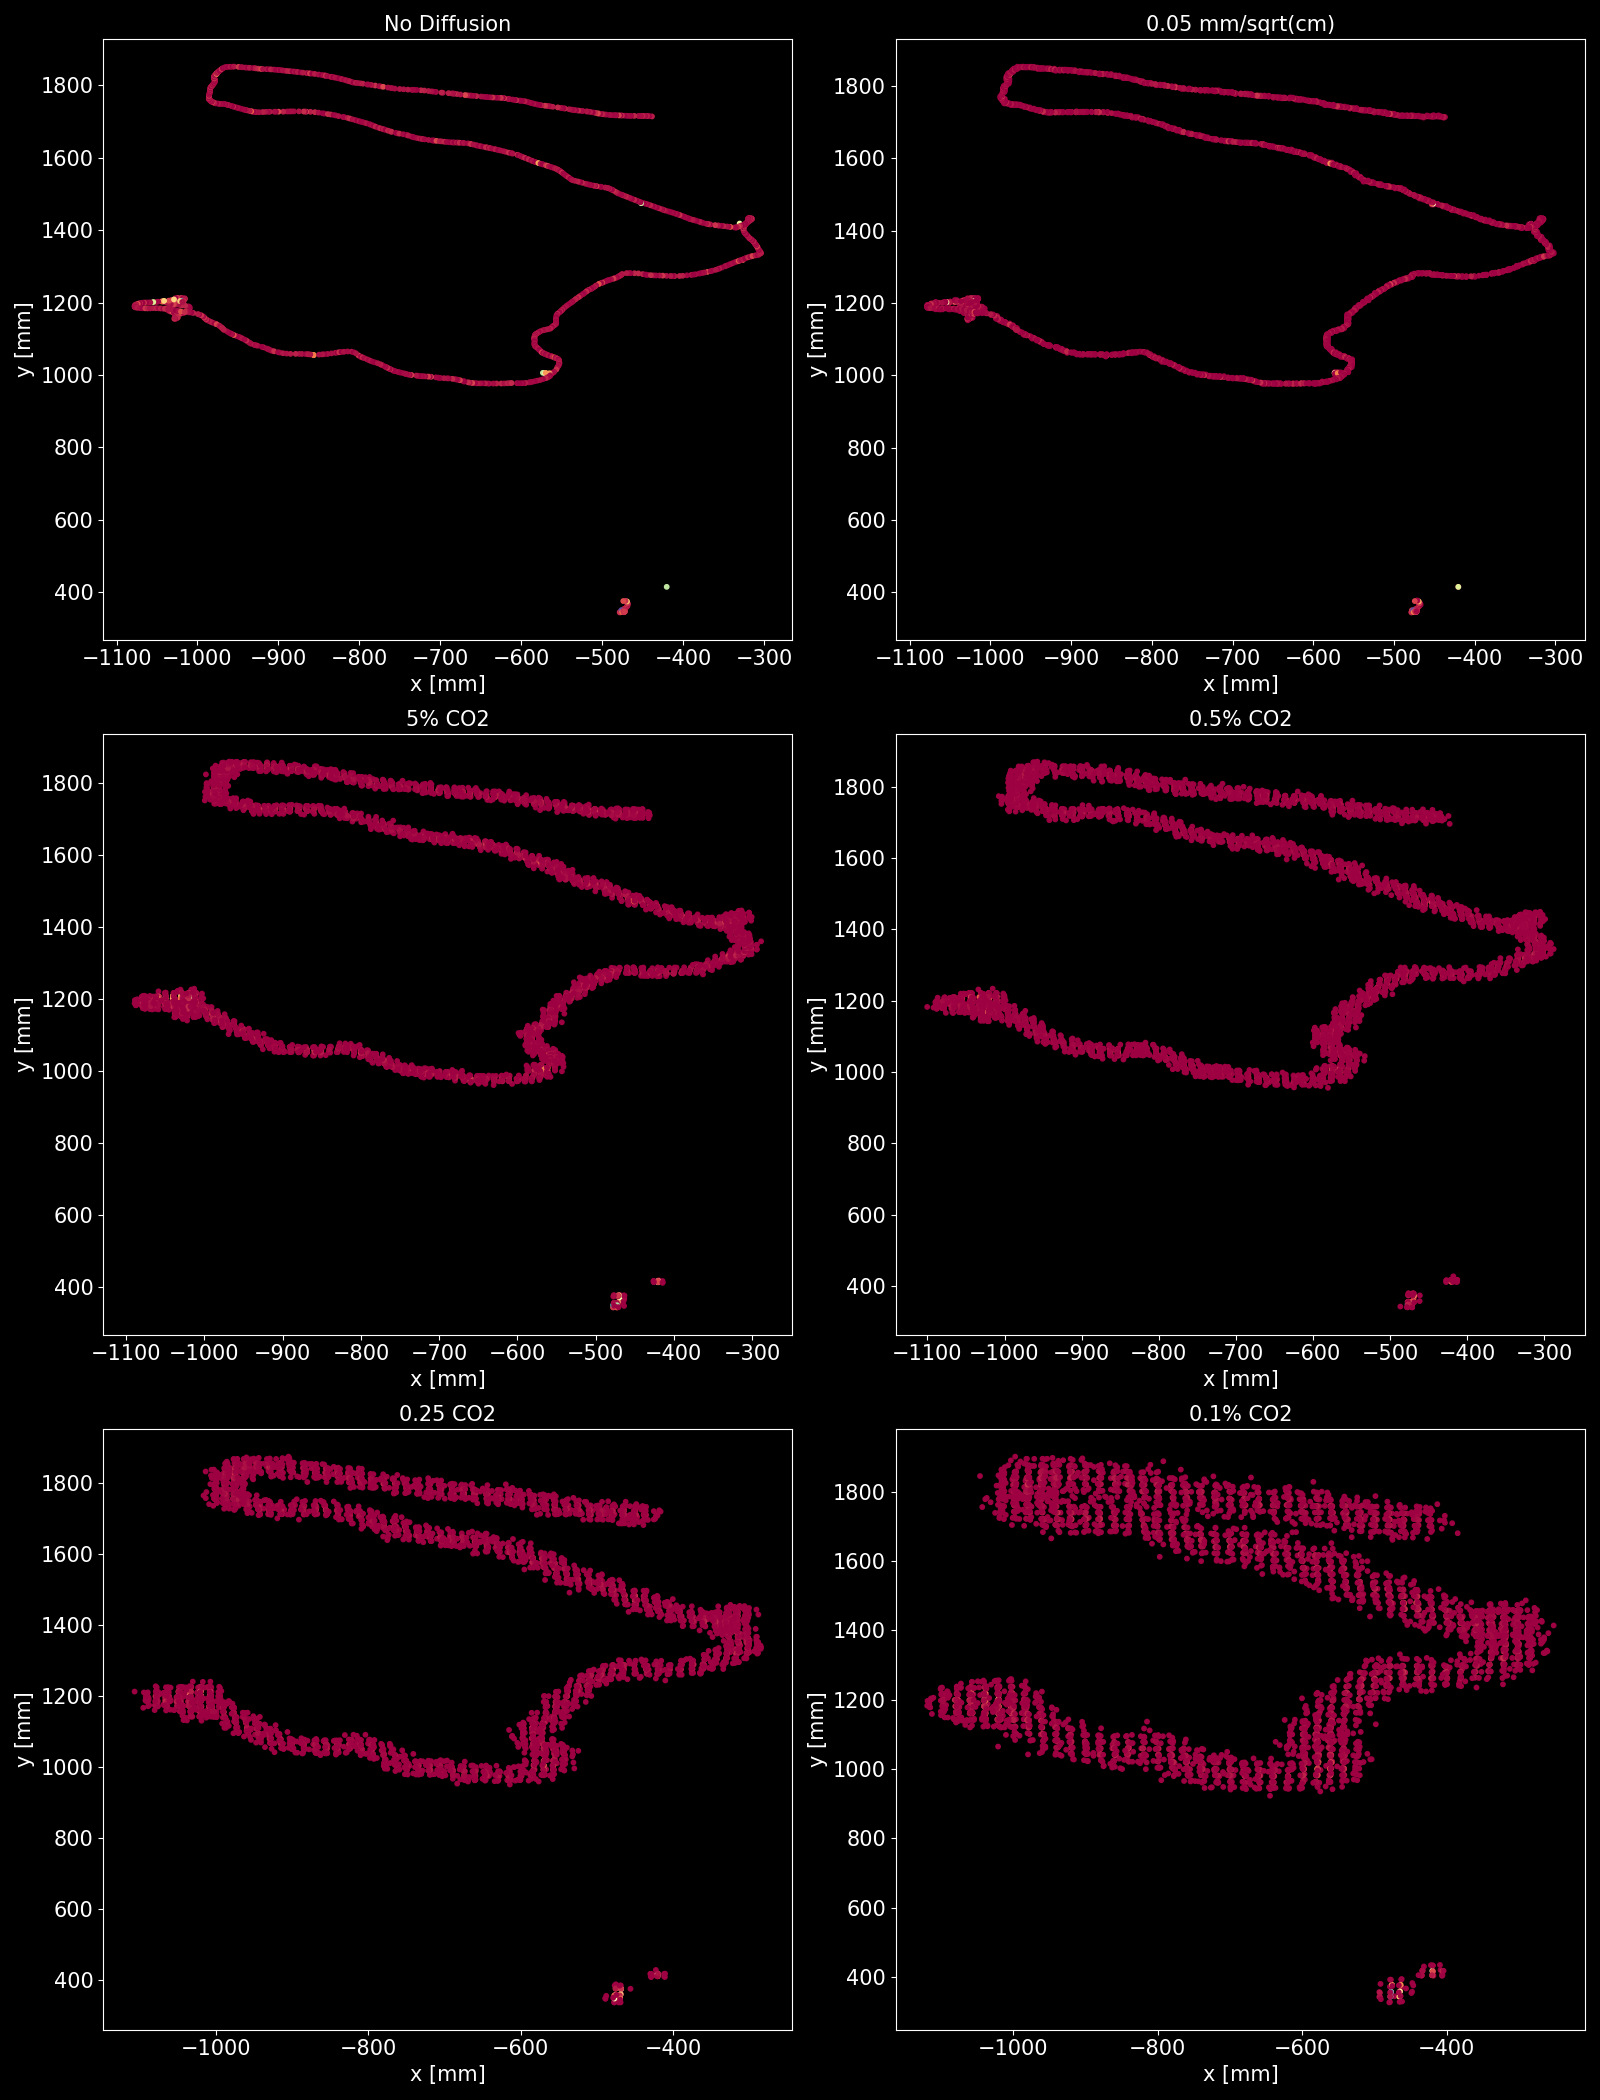

In [39]:


fig  = plt.figure(figsize=(16, 7*3))

file_num = "1"
# mode="0nubb"
mode="Tl"
# mode="Bi"


hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)


PlotEvent(321, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", "No Diffusion", eid)
PlotEvent(322, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.05percent_smear_{file_num}.h5", "0.05 mm/sqrt(cm)", eid)
PlotEvent(323, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_5.0percent_smear_{file_num}.h5", "5% CO2", eid)
PlotEvent(324, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.5percent_smear_{file_num}.h5", "0.5% CO2", eid)
PlotEvent(325, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.25percent_smear_{file_num}.h5", "0.25 CO2", eid)
PlotEvent(326, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.1percent_smear_{file_num}.h5", "0.1% CO2", eid)



370000


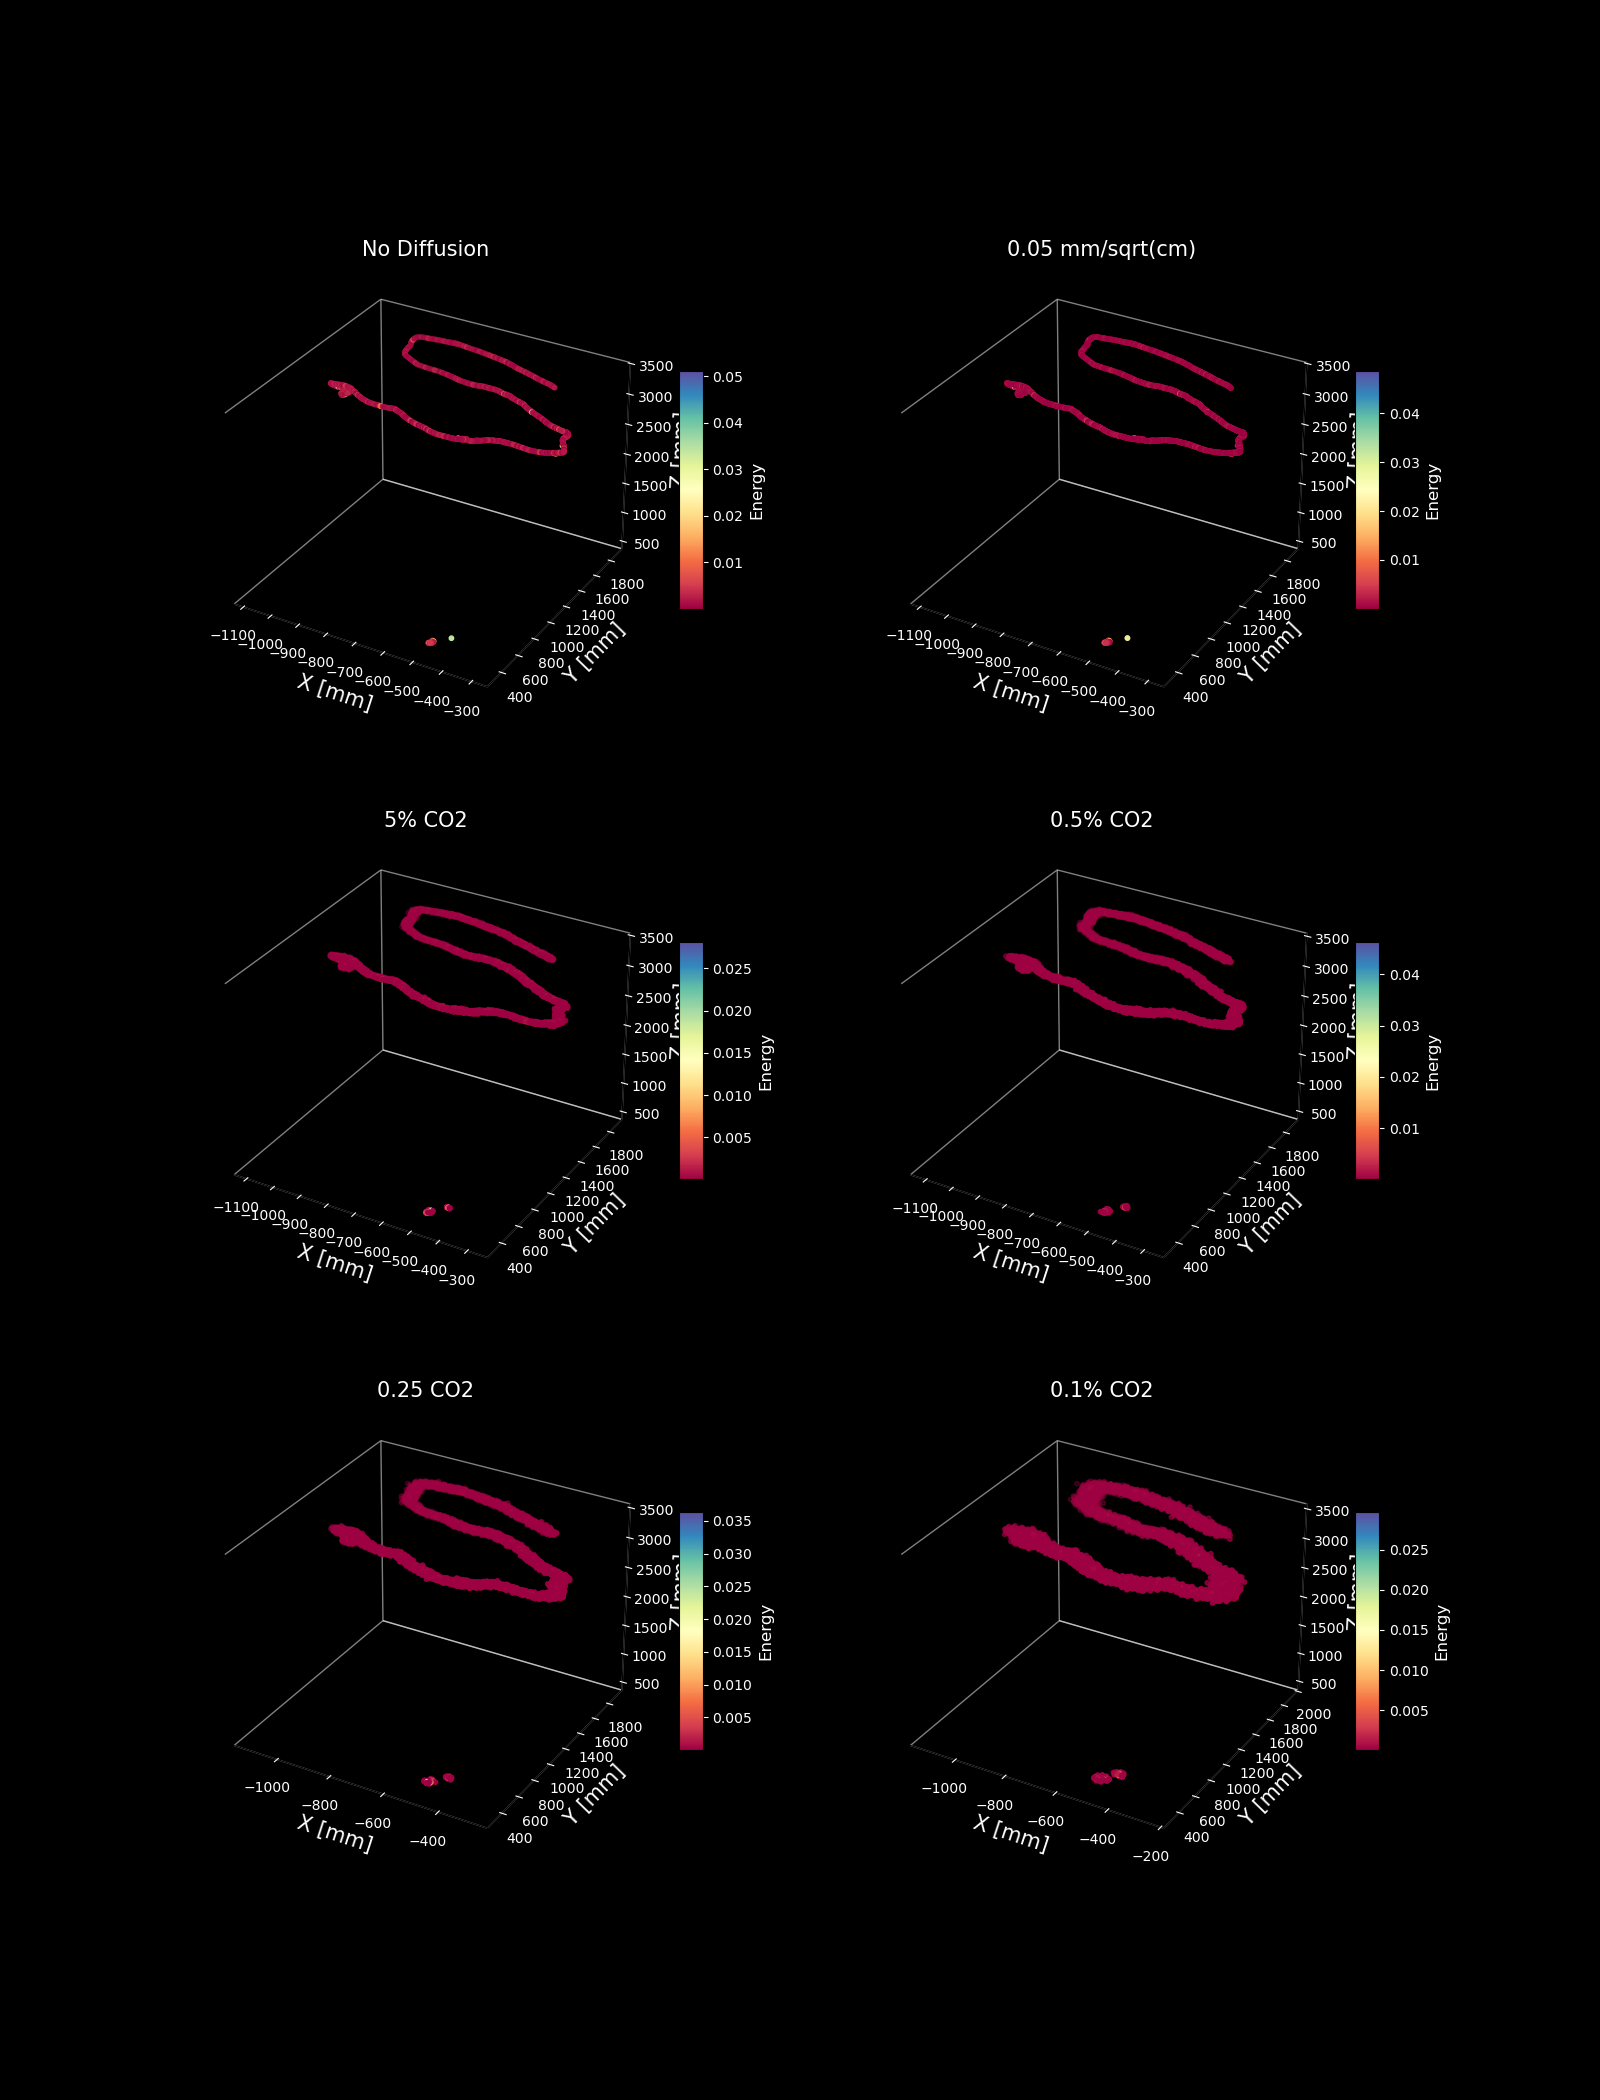

In [40]:
def PlotEvent3D(axis, file_, title, eid):
    hits = pd.read_hdf(file_, 'MC/hits')
    event_hits = hits[hits.event_id == eid]

    # Create 3D axes
    ax = fig.add_subplot(axis, projection='3d')

    fig.set_facecolor('black')
    ax.set_facecolor('black')

    # Scatter plot in 3D
    sc = ax.scatter(event_hits.x, event_hits.y, event_hits.z, 
                    c=event_hits.energy, cmap='Spectral', s=10, label="Reco hits")

    ax.set_xlabel("X [mm]", fontsize=15, color='white')
    ax.set_ylabel("Y [mm]", fontsize=15, color='white')
    ax.set_zlabel("Z [mm]", fontsize=15, color='white')

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.tick_params(axis='z', colors='white')

    ax.set_title(title, fontsize=15, color='white')

    # Set dark theme
    ax.xaxis.pane.set_edgecolor("white")
    ax.yaxis.pane.set_edgecolor("white")
    ax.zaxis.pane.set_edgecolor("white")
    ax.grid(False)

    # Add colorbar
    cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label("Energy", fontsize=12, color='white')
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

    # Remove background (axis)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

fig = plt.figure(figsize=(16, 21))

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(321, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", "No Diffusion", eid)
PlotEvent3D(322, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.05percent_smear_{file_num}.h5", "0.05 mm/sqrt(cm)", eid)
PlotEvent3D(323, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_5.0percent_smear_{file_num}.h5", "5% CO2", eid)
PlotEvent3D(324, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.5percent_smear_{file_num}.h5", "0.5% CO2", eid)
PlotEvent3D(325, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.25percent_smear_{file_num}.h5", "0.25 CO2", eid)
PlotEvent3D(326, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_0.1percent_smear_{file_num}.h5", "0.1% CO2", eid)

370000
320000
314000
306000


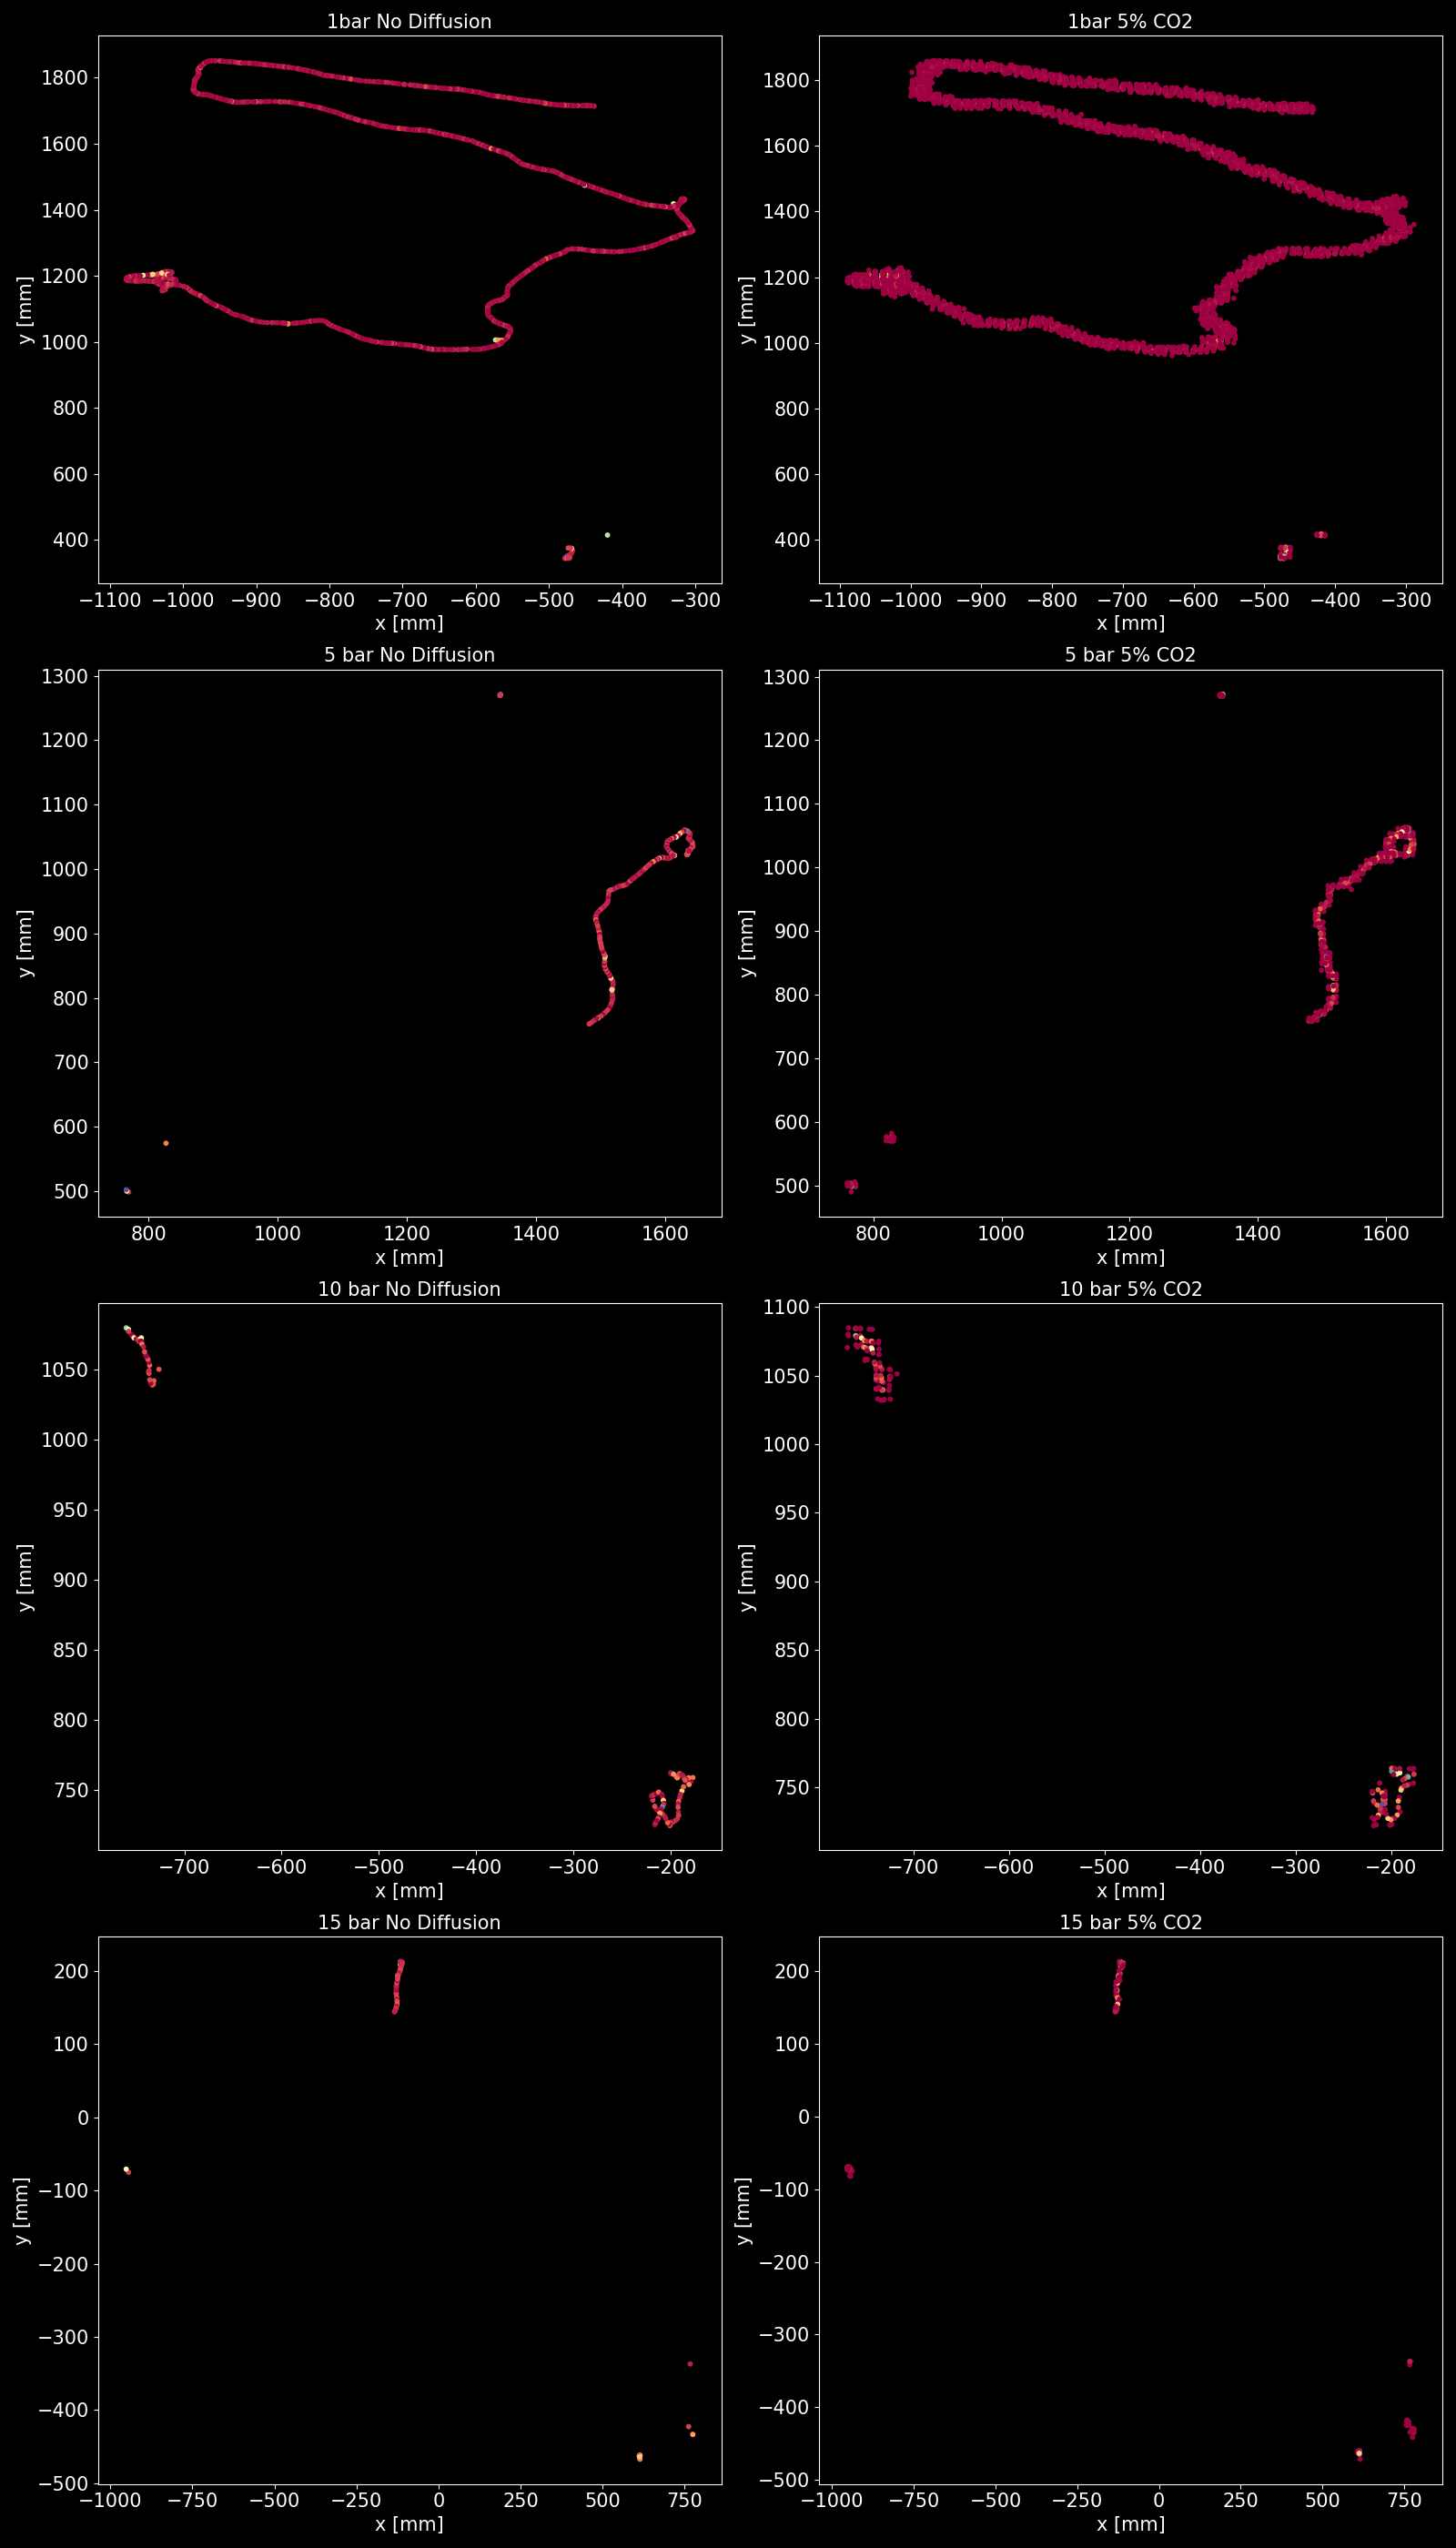

In [41]:


fig  = plt.figure(figsize=(16, 7*4))


hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(421, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", "1bar No Diffusion", eid)
PlotEvent(422, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_5.0percent_smear_{file_num}.h5", "1bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_5bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(423, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_smear_{file_num}.h5", "5 bar No Diffusion", eid)
PlotEvent(424, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_5.0percent_smear_{file_num}.h5", "5 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode }_10bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(425, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_smear_{file_num}.h5", "10 bar No Diffusion", eid)
PlotEvent(426, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_5.0percent_smear_{file_num}.h5", "10 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_15bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent(427, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_smear_{file_num}.h5", "15 bar No Diffusion", eid)
PlotEvent(428, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_5.0percent_smear_{file_num}.h5", "15 bar 5% CO2", eid)




370000
320000
314000
306000


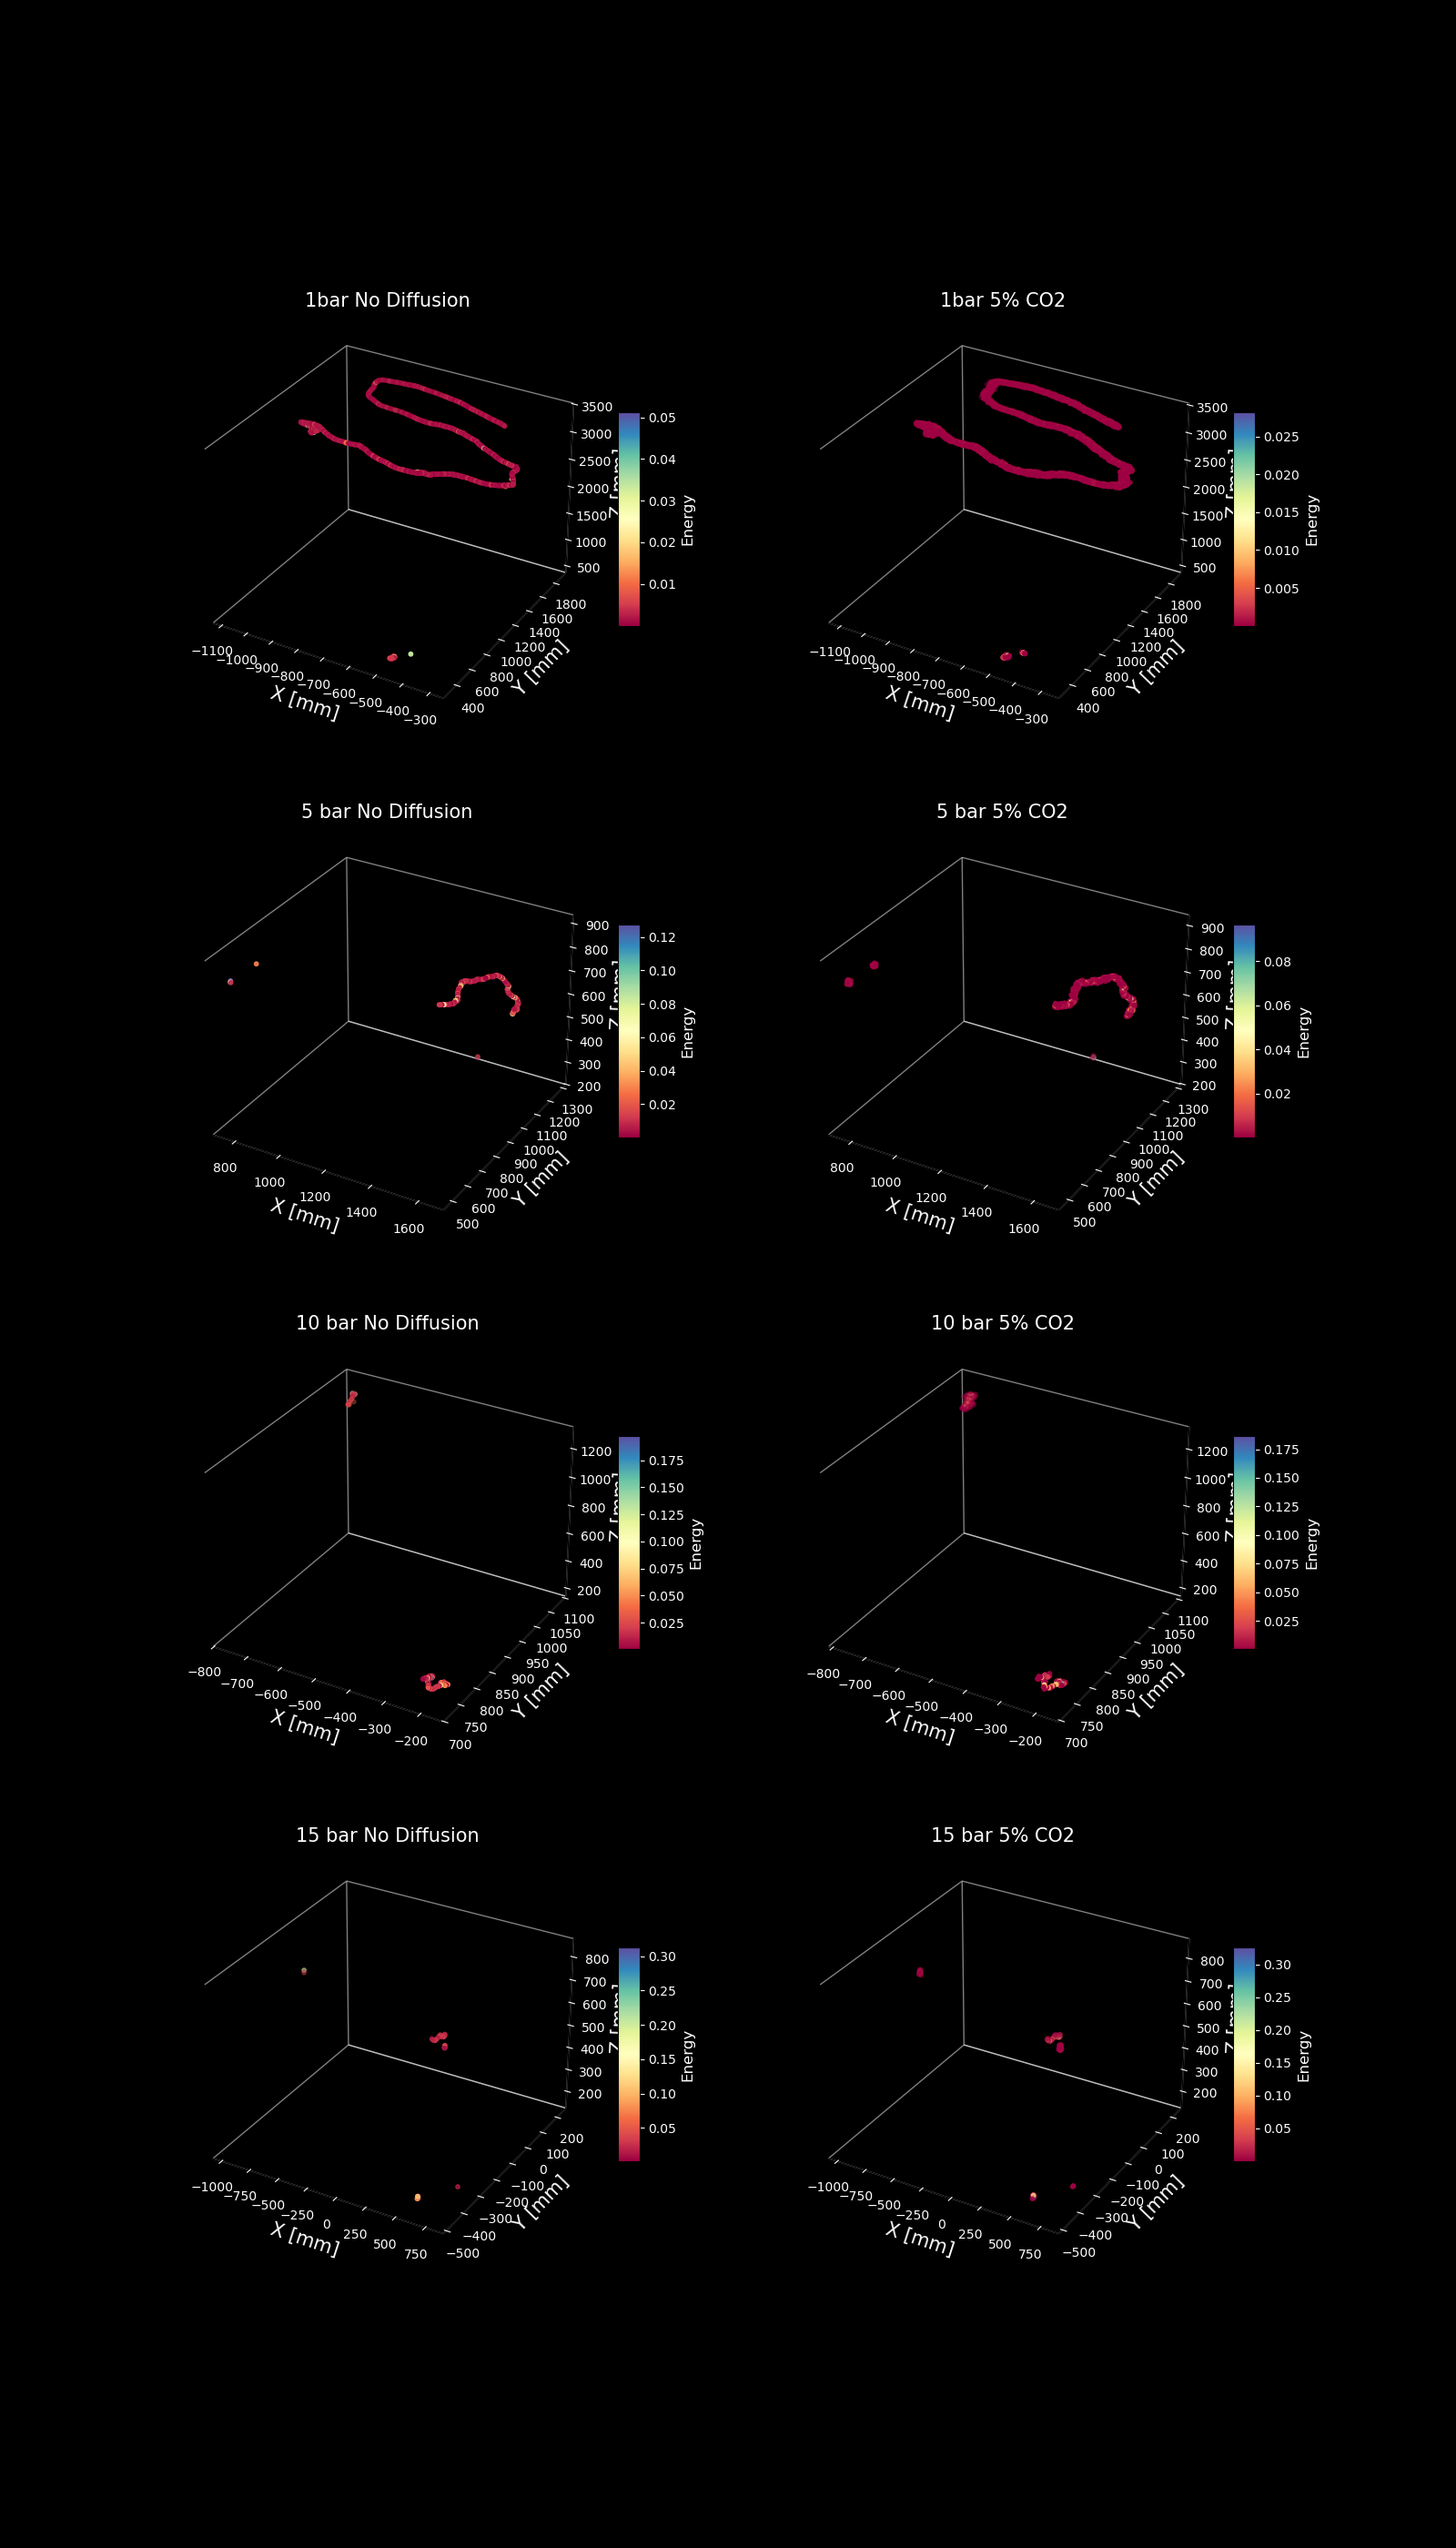

In [42]:


fig  = plt.figure(figsize=(16, 7*4))


hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(421, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_smear_{file_num}.h5", "1bar No Diffusion", eid)
PlotEvent3D(422, f"../data/ATPC_{mode}/ATPC_{mode}_1bar_5.0percent_smear_{file_num}.h5", "1bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_5bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(423, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_smear_{file_num}.h5", "5 bar No Diffusion", eid)
PlotEvent3D(424, f"../data/ATPC_{mode}/ATPC_{mode}_5bar_5.0percent_smear_{file_num}.h5", "5 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode }_10bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(425, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_smear_{file_num}.h5", "10 bar No Diffusion", eid)
PlotEvent3D(426, f"../data/ATPC_{mode}/ATPC_{mode}_10bar_5.0percent_smear_{file_num}.h5", "10 bar 5% CO2", eid)

hits = pd.read_hdf(f"../data/ATPC_{mode}/ATPC_{mode}_15bar_smear_{file_num}.h5", 'MC/hits')
eid = hits["event_id"].unique()[0]
print(eid)

PlotEvent3D(427, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_smear_{file_num}.h5", "15 bar No Diffusion", eid)
PlotEvent3D(428, f"../data/ATPC_{mode}/ATPC_{mode}_15bar_5.0percent_smear_{file_num}.h5", "15 bar 5% CO2", eid)


